In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## De data inlezen en bekijken

In [28]:
data = pd.read_csv('../dataset/real_estate.csv')

In [29]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [30]:
data.info

<bound method DataFrame.info of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

## Verdeelde de dataset in train en test

In [31]:
X = data.drop('Y house price of unit area', axis=1)

y= data['Y house price of unit area']

y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

## Train het model

In [33]:
clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression()

In [34]:
pd.DataFrame(clr.coef_, X.columns, columns=['coeficient'])


,coeficient
No,-0.004113
X1 transaction date,5.110892
X2 house age,-0.251042
X3 distance to the nearest MRT station,-0.005408
X4 number of convenience stores,0.799579
X5 latitude,234.736129
X6 longitude,-20.524926


In [35]:
## voorspellingen maken

In [36]:
y_pred= clr.predict(X_test)
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred}).head()


,Y_test,Y_pred
41,18.2,15.810598
394,24.7,13.888426
405,37.2,37.085399
342,53.5,48.348456
398,23.0,33.528956


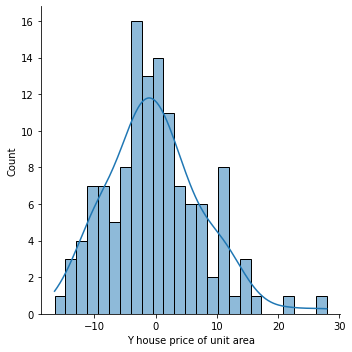

In [38]:
test_minus_pred = y_test - y_pred

sns.displot(test_minus_pred, bins=25, kde=True)



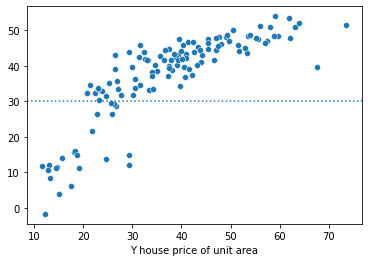

In [44]:
sns.scatterplot(x=y_test, y=y_pred)

plt.axhline(y=30, ls=':')